In [176]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# importing liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# importing the datasets
moodle = pd.read_excel('moodle_logs_dataset.xlsx', sheetname='logs_CCCH9051_1A_2018_20201027-')
survey = pd.read_excel('survey_dataset.xlsx', sheetname='Survey_Performance_data')

### Assessing the Data

In [177]:
survey.head()

,ID,Full name,Username,Q05_Gender,"Q01_LO->Demonstrate a good understanding of cultural heritages, their values and significance in history and in todayâ€™s society.",Q01_LO->Describe and explain the importance of preserving cultural heritage and strategies and methods applied worldwide,Q01_LO->Apply digital technologies to promoting local and Chinese cultural heritage to a global audience.,Q01_LO->Apply principles and ethics of information to cultural heritage conservation and preservation.,Q01_LO->Design and create digital services for organizing and accessing heritage information from a user-centered perspective.,Q02_Lecture,...,Q00_Satisfaction,Q02_Spherical photo,Q00_Best experience (open),Q00_Experience to improve (Open),Q00_Enough support,Q00_More support (Open),Q00_Future use,Q00_Additional share (Open),Grade,Score
0,S001,Magow Adwithya,adwithya,2,4,4,4,4,4,I have learnt about the different types of cul...,...,4.0,0.0,The best part of making a VR story would be ac...,Taking of the pictures takes a lot of time and...,1.0,0,1 : Highly in Favor,0,A,89.237500
1,S002,Tam Yuen Ki,amytam,1,5,4,5,4,4,"I learnt the values, significance, preservatio...",...,4.0,1.0,The best part is taking some 360 degree photos...,The skill of taking a 360 degree photo as the ...,1.0,0,2 : Somewhat in Favor,0,A,89.129167
2,S003,Ng Si Ki Annette,annette1,1,5,5,4,5,4,The definitions of different Dublin core. The ...,...,4.0,1.0,I get to really see the production of VR. It w...,There can be display of good work so I can kno...,1.0,0,2 : Somewhat in Favor,I think it is fun to encourage us to really vi...,A,89.593056
3,S004,Le Bert Ngoc,bnl007,2,5,4,5,5,4,I learned what cultural heritage is and how to...,...,5.0,1.0,Seeing how the VR story looks like at the end....,The website use to make the VR story sometime ...,1.0,"none, Jeremy did a great job providing materia...",2 : Somewhat in Favor,none,A,91.962500
4,S005,Ng Cho Sum,chosum21,1,4,3,4,4,4,I have learnt different values of cultural her...,...,4.0,1.0,"In the past experiences of visiting museums, I...",When I was using stories360 to make my VR Stor...,1.0,0,1 : Highly in Favor,0,A-,84.765278


In [178]:
moodle.head()

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,ID,Counts,regularity
19,"7/12/19, 11:52",Wan Hei Lok,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '138127' viewed the course wi...,web,221.124.56.245,S047,596,596
20,"4/12/19, 23:34",Gupta Abheeshek,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '177686' viewed the course wi...,web,182.68.207.64,S089,792,792
23,"1/12/19, 23:16",Cheung Man Chung,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '173343' viewed the course wi...,web,119.247.243.166,S081,614,614
40,"25/11/19, 23:48",Wong Hiu Kwan,-,File: Course outline (updated: Oct 12 -- minor...,File,Course module viewed,The user with id '172551' viewed the 'resource...,web,125.59.35.56,S043,621,621
41,"25/11/19, 23:48",Wong Hiu Kwan,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '172551' viewed the course wi...,web,125.59.35.56,S043,621,621


In [25]:
moodle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79366 entries, 0 to 79365
Data columns (total 10 columns):
Time              79366 non-null object
User full name    79366 non-null object
Affected user     79366 non-null object
Event context     79366 non-null object
Component         79366 non-null object
Event name        79366 non-null object
Description       79366 non-null object
Origin            79366 non-null object
IP address        79366 non-null object
ID                57790 non-null object
dtypes: object(10)
memory usage: 6.1+ MB


In [179]:
survey.describe()

,Q05_Gender,"Q01_LO->Demonstrate a good understanding of cultural heritages, their values and significance in history and in todayâ€™s society.",Q01_LO->Describe and explain the importance of preserving cultural heritage and strategies and methods applied worldwide,Q01_LO->Apply digital technologies to promoting local and Chinese cultural heritage to a global audience.,Q01_LO->Apply principles and ethics of information to cultural heritage conservation and preservation.,Q01_LO->Design and create digital services for organizing and accessing heritage information from a user-centered perspective.,"Q05_Video_usefulness->Learning activities (e.g. lectures, tutorials)",Q05_Video_usefulness->Learning tools used in the course (e.g. Omeka),Q05_Video_usefulness->Assessment tasks (e.g. group project),Q05_Video_usefulness->Overall,Q00_Satisfaction,Q02_Spherical photo,Q00_Enough support,Score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,88.000000,88.000000,88.0,97.000000
mean,1.474227,4.226804,4.144330,4.237113,3.948454,4.216495,4.247423,4.226804,4.082474,4.195876,4.102273,0.897727,1.0,85.443328
std,0.662897,0.714510,0.777143,0.826302,0.782239,0.739183,0.764184,0.756984,0.837532,0.686767,0.568114,0.304743,0.0,10.284298
min,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.0,48.088889
25%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.0,82.826389
50%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.0,87.312500
75%,2.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.0,91.962500
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.0,99.800000


### Cleaning the data

In [44]:
# dropping all rows that contain "Ng Tzi Dong" aka the teacher 
moodle = moodle[moodle["User full name"] != "Ng Tzi Dong"]

# removing teachers (a teacher has no ID in the ID column)
moodle = moodle[moodle["ID"].notna()]

In [180]:
moodle.head()

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,ID,Counts,regularity
19,"7/12/19, 11:52",Wan Hei Lok,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '138127' viewed the course wi...,web,221.124.56.245,S047,596,596
20,"4/12/19, 23:34",Gupta Abheeshek,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '177686' viewed the course wi...,web,182.68.207.64,S089,792,792
23,"1/12/19, 23:16",Cheung Man Chung,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '173343' viewed the course wi...,web,119.247.243.166,S081,614,614
40,"25/11/19, 23:48",Wong Hiu Kwan,-,File: Course outline (updated: Oct 12 -- minor...,File,Course module viewed,The user with id '172551' viewed the 'resource...,web,125.59.35.56,S043,621,621
41,"25/11/19, 23:48",Wong Hiu Kwan,-,Course: CCCH9051 Digitizing Cultural Heritage ...,System,Course viewed,The user with id '172551' viewed the course wi...,web,125.59.35.56,S043,621,621


## Geting Global insights and Descriptive statistics 

In [46]:
# Maximum Score
# Minimum Score
# Average Score
# Most  Score
survey.Score.describe()

count    97.000000
mean     85.443328
std      10.284298
min      48.088889
25%      82.826389
50%      87.312500
75%      91.962500
max      99.800000
Name: Score, dtype: float64

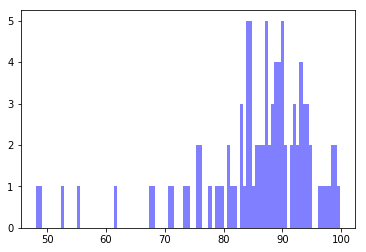

In [47]:
# plotting the Scores of students as a histogram 
plt.hist(survey.Score, 97, facecolor='blue', alpha=0.5)
plt.show()

As you can notice the distribution of scores is left-skewed which shows higher scoring tendency for students.

### Clustering 

In [ ]:
# female gender clustering and insights generation

females = survey[survey['Q05_Gender'] == 1]

# Maximum Score
# Minimum Score
# Average Score
# Most  Score
females.Score.describe()

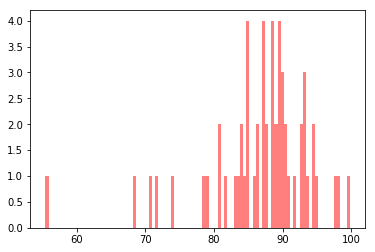

In [96]:
# plotting the Scores of female students as a histogram 
plt.hist(females.Score, 97, facecolor='red', alpha=0.5)
plt.show()

In [93]:
# male gender clustering and insights generation

males = survey[survey['Q05_Gender'] == 2]

# Maximum Score
# Minimum Score
# Average Score
# Most  Score
males.Score.describe()

count    37.000000
mean     83.273064
std      13.533588
min      48.088889
25%      76.206944
50%      85.223611
75%      93.627778
max      98.850000
Name: Score, dtype: float64

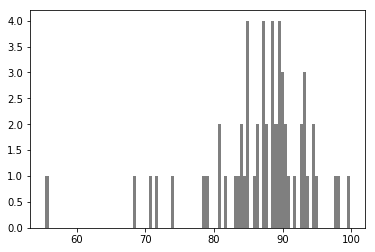

In [95]:
# plotting the Scores of female students as a histogram 
plt.hist(females.Score, 97, facecolor='black', alpha=0.5)
plt.show()

After looking at the analysed dataset only for males and only for females, it's clearly shown that females have higher mean of scores (86.698674) than males (83.273064). However, the distribution for both are close.

### Matching two datasets
How many times did each user log into the Moodle and how did that affect their grades? 

In [59]:
moodle['regularity'] = moodle.groupby(['ID'])['ID'].transform('count')

In [71]:
regularity_df = moodle[['ID','regularity']].drop_duplicates().reset_index().sort_values(['ID'], ascending=True)

In [72]:
grades_df = survey[['ID','Score','Grade']]

### Matching Grades with Regularity 

In [74]:
# mergeing datasets into one main dataset 
reg_grades = pd.merge(regularity_df, grades_df, how='inner',on=['ID'])

Now we plot the Scores Vs Regularity to see if there is a relation between both of them on x axis the Regularity to log in and on Y axis the score 

best fit line:
y = 68.09 + 0.03x


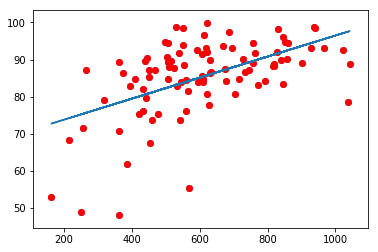

In [84]:
X = reg_grades.regularity
Y = reg_grades.Score
plt.plot(X, Y, 'o', color='red');

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

As we can clearly see, Regularity has positively affected the scores of the students. They are both related with lineraly with this equation y = 68.09 + 0.03x

In short, it shows that the more the student have got into the course on Moodle, the higher score that person got.

### Logs from the Learning Management System activities Correlations with online Final scores

For that matter we need to make a correlation map between activities and Scores to be able to assess this relationships

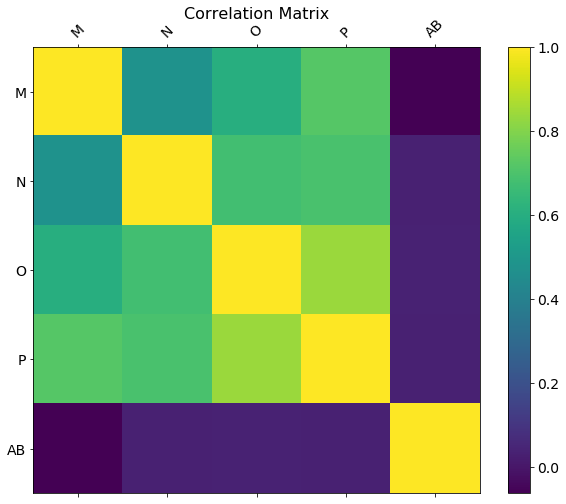

In [111]:
survey_AZ = pd.read_excel('survey_dataset_AZ.xlsx', sheetname='Survey_Performance_data')

df = survey_AZ[["M","N","O","P","AB"]]

f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

As indicated in the correlation matrix, the online activities named after the column letters in the dataset [M, N, O, P] has no indication on the overall score [AB] that the students got. The survey results can not set a certian indiction.

## Clustering the dataset based on Moodle activities: Adding a Submission, Involved in Discussion, and Using Moodle Forum.

# Number of submissions activity affecting score

In [166]:
# adding a submission
submission = moodle[moodle['Event name'] == 'Add Submission']

# how many times did each user do a submission
submission['count_sub'] = submission.groupby(['ID'])['ID'].transform('count')
new_sub = submission.groupby(['ID']).ID.count()
submission[['ID','count_sub']].drop_duplicates().sort_values(['ID'],ascending=True)

subs_grades = pd.merge(submission,survey,how='inner',on=['ID'])[['ID','Score','count_sub']].drop_duplicates()

C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now we plot the Scores Vs Number of Submissions to see if there is a relation between both of them on x axis the Number of Submissions and on Y axis the score

best fit line:
y = 81.99 + 0.92x


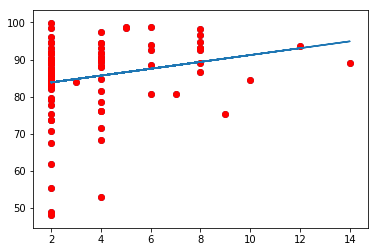

In [169]:
X = subs_grades.count_sub
Y = subs_grades.Score
plt.plot(X, Y, 'o', color='red');

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

Yes, there is a linear relationship (y = 81.99 + 0.92x) between Number of submissions Activity and Score. The more the students submit assignments and reports, the more likely they get higher scores.

In [166]:
# adding a submission
submission = moodle[moodle['Event name'] == 'Add Submission']

# how many times did each user do a submission
submission['count_sub'] = submission.groupby(['ID'])['ID'].transform('count')
new_sub = submission.groupby(['ID']).ID.count()
submission[['ID','count_sub']].drop_duplicates().sort_values(['ID'],ascending=True)

subs_grades = pd.merge(submission,survey,how='inner',on=['ID'])[['ID','Score','count_sub']].drop_duplicates()

C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now we plot the Scores Vs Number of Submissions to see if there is a relation between both of them on x axis the Number of Submissions and on Y axis the score

# Being Involved in Discussion activity affecting score

In [170]:
# adding a submission
discussion = moodle[moodle['Event name'] == 'Discussion viewed']

# how many times did each user do a submission
discussion['count_dis'] = discussion.groupby(['ID'])['ID'].transform('count')
new_dis = discussion.groupby(['ID']).ID.count()
discussion[['ID','count_dis']].drop_duplicates().sort_values(['ID'],ascending=True)

dis_grades = pd.merge(discussion,survey,how='inner',on=['ID'])[['ID','Score','count_dis']].drop_duplicates()

C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now we plot the Scores Vs Number of discussion participations per student to see if there is a relation between both of them on x axis the Number of discussion participations and on Y axis the score

best fit line:
y = 73.77 + 0.12x


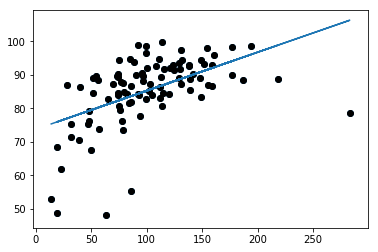

In [171]:
X = dis_grades.count_dis
Y = dis_grades.Score
plt.plot(X, Y, 'o', color='black');

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

Yes, there is a strong linear relationship (y = 73.77 + 0.12x) between Number of discussion participation Activity and Score. The more the students participate in discussion, the more likely they get higher scores.

# Forum Engagment activity affecting score

In [173]:
# adding a submission
forum = moodle[moodle['Component'] == 'Forum']

# how many times did each user do a submission
forum['count_forum'] = forum.groupby(['ID'])['ID'].transform('count')
new_forum = forum.groupby(['ID']).ID.count()
forum[['ID','count_forum']].drop_duplicates().sort_values(['ID'],ascending=True)

forum_grades = pd.merge(forum,survey,how='inner',on=['ID'])[['ID','Score','count_forum']].drop_duplicates()

C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now we plot the Scores Vs Number of Forum Engagment times per student to see if there is a relation between both of them on x axis the Number of Forum Engagment times per student and on Y axis the score

best fit line:
y = 72.14 + 0.05x


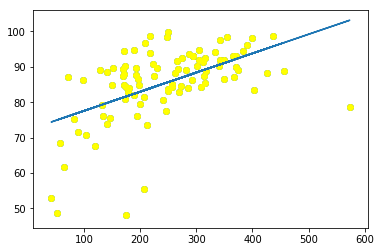

In [175]:
X = forum_grades.count_forum
Y = forum_grades.Score
plt.plot(X, Y, 'o', color='yellow');

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

Yes, there is a strong linear relationship (y = 72.14 + 0.05x) between Number of Forum Engagment times per student Activity and Score. The more the students engage in forums, the more likely they get higher scores.